In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('pizza_sales.csv')

display(df.head())


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01/01/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01/01/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01/01/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


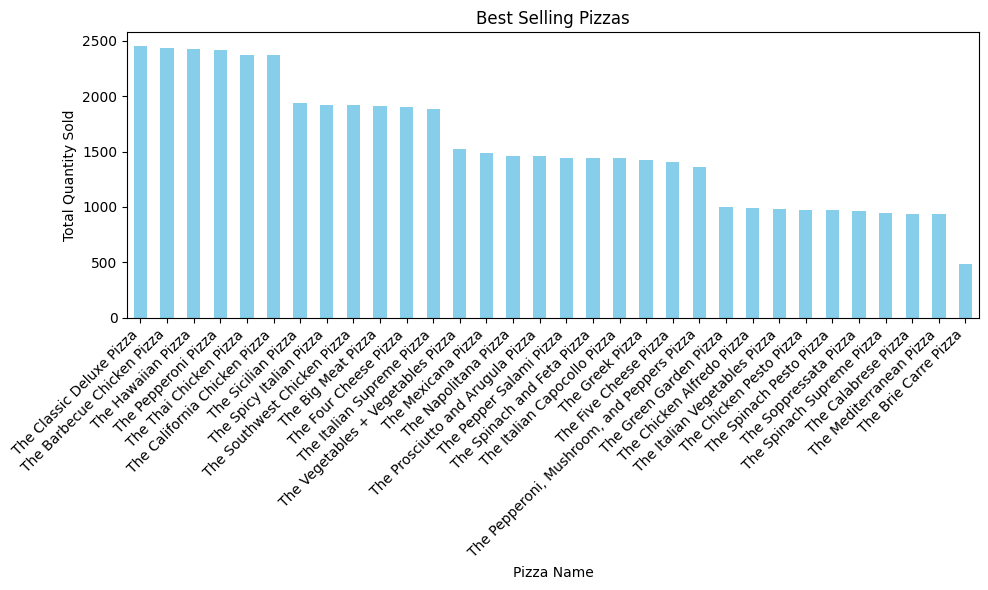

In [6]:
pizza_sales_totals = df.groupby('pizza_name')['quantity'].sum()

best_selling_pizzas = pizza_sales_totals.sort_values(ascending=False)


# Plotting the results
plt.figure(figsize=(10, 6))  # Adjust the figure size here as width x height in inches
best_selling_pizzas.plot(kind='bar', color='skyblue')
plt.title('Best Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation


# Show the plot
plt.show()

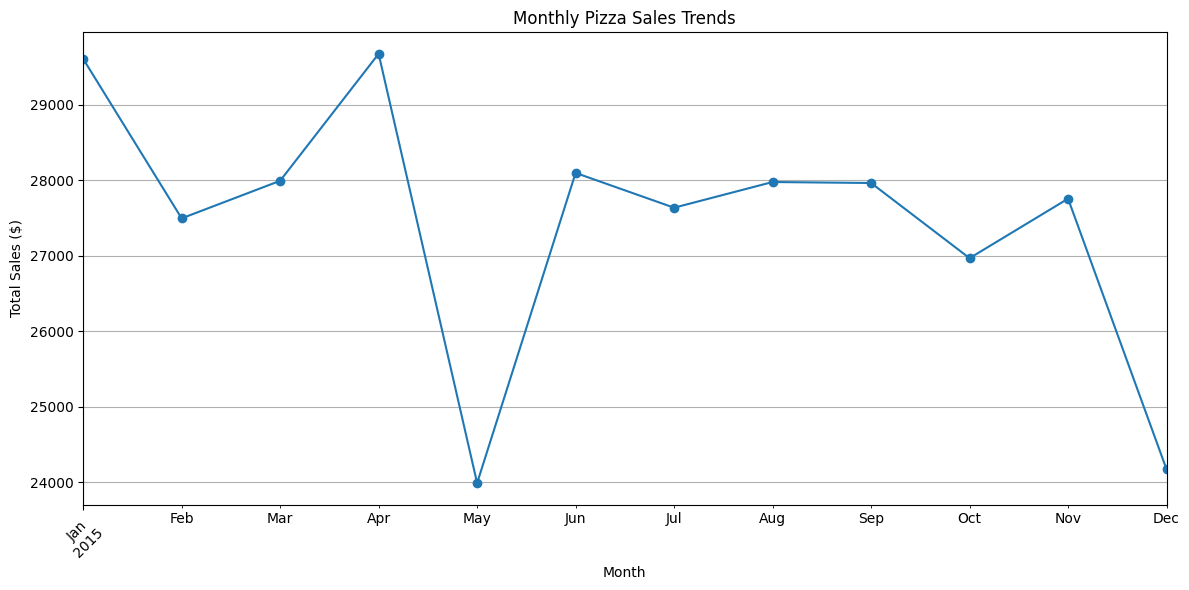

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['total_price'].sum()


plt.figure(figsize=(12, 6)) 
monthly_sales.plot(kind='line', marker='o', linestyle='-')  
plt.title('Monthly Pizza Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  


plt.show()


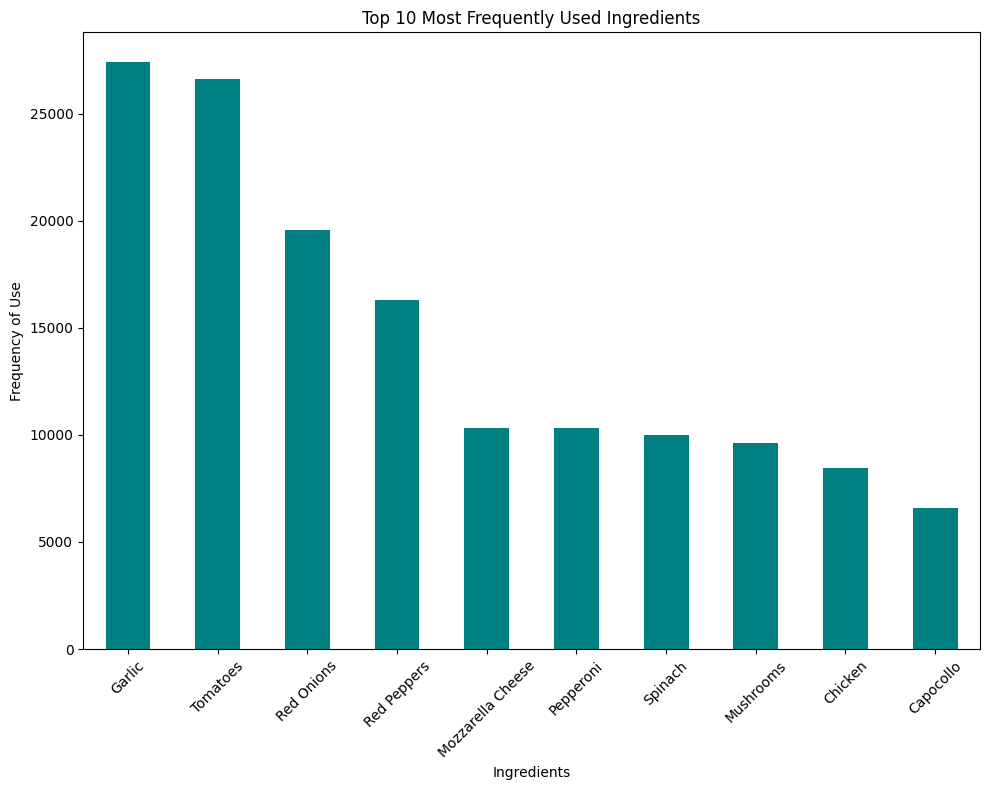

In [8]:
# Split the ingredients string into a list of ingredients per row
df['ingredients_list'] = df['pizza_ingredients'].str.split(', ')

# Explode the ingredients_list into separate rows for each ingredient
ingredients = df.explode('ingredients_list')

# Count the occurrences of each ingredient
ingredient_counts = ingredients['ingredients_list'].value_counts()

# Plot the most frequently used ingredients
plt.figure(figsize=(10, 8))  # Set the size of the plot
ingredient_counts.head(10).plot(kind='bar', color='teal')  # Only show top 10 for clarity
plt.title('Top 10 Most Frequently Used Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frequency of Use')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()



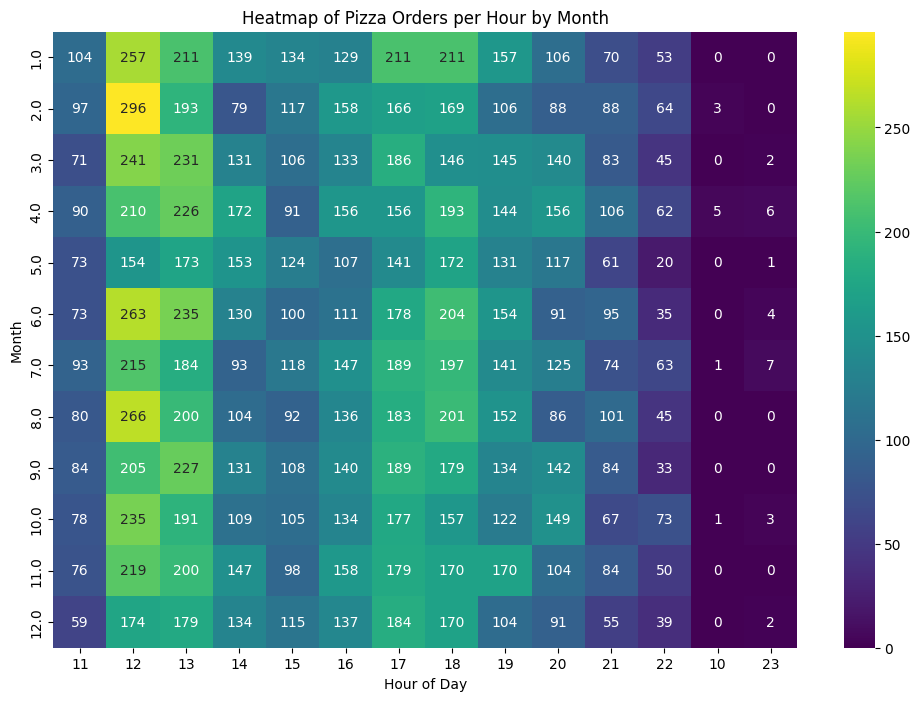

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df['month'] = df['order_date'].dt.month

df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time

df['hour'] = df['order_time'].apply(lambda x: x.hour)

# Group by month and hour, then count the number of orders
order_distribution = df.groupby(['month', 'hour']).size().unstack(fill_value=0)

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(order_distribution, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Pizza Orders per Hour by Month')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()



pizza_name
The Thai Chicken Pizza                        43434.25
The Barbecue Chicken Pizza                    42768.00
The California Chicken Pizza                  41409.50
The Classic Deluxe Pizza                      38180.50
The Spicy Italian Pizza                       34831.25
The Southwest Chicken Pizza                   34705.75
The Italian Supreme Pizza                     33476.75
The Hawaiian Pizza                            32273.25
The Four Cheese Pizza                         32265.70
The Sicilian Pizza                            30940.50
The Pepperoni Pizza                           30161.75
The Greek Pizza                               28454.10
The Mexicana Pizza                            26780.75
The Five Cheese Pizza                         26066.50
The Pepper Salami Pizza                       25529.00
The Italian Capocollo Pizza                   25094.00
The Vegetables + Vegetables Pizza             24374.75
The Prosciutto and Arugula Pizza              24193.25

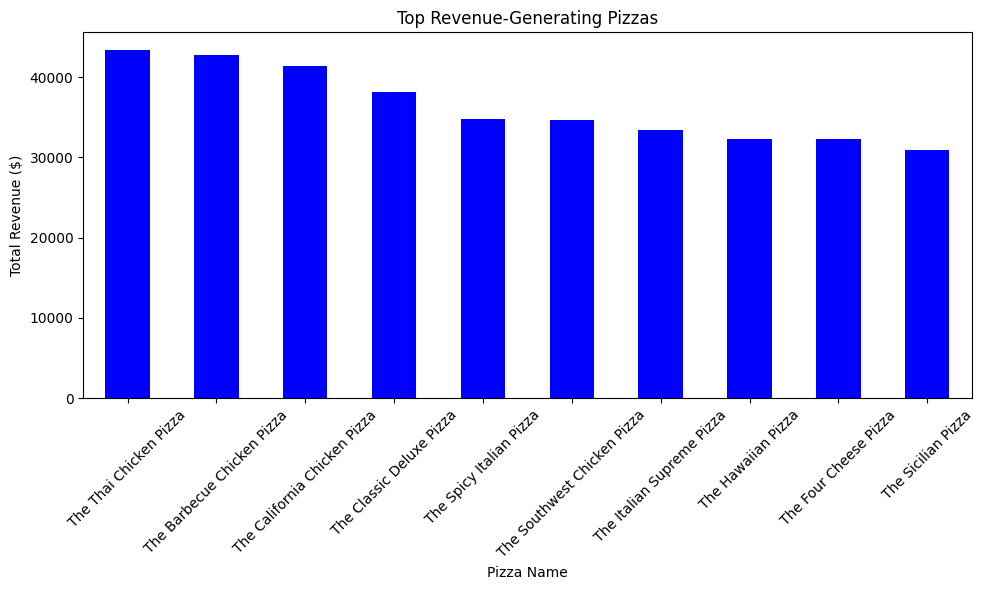

In [10]:
df['revenue'] = df['quantity'] * df['unit_price']

# Aggregate total revenue by pizza name
pizza_revenue = df.groupby('pizza_name')['revenue'].sum().sort_values(ascending=False)

# Display the revenue data
print(pizza_revenue)

# Plot the revenue data
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
pizza_revenue.head(10).plot(kind='bar', color='blue')  # Plotting top 10 for clarity
plt.title('Top Revenue-Generating Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


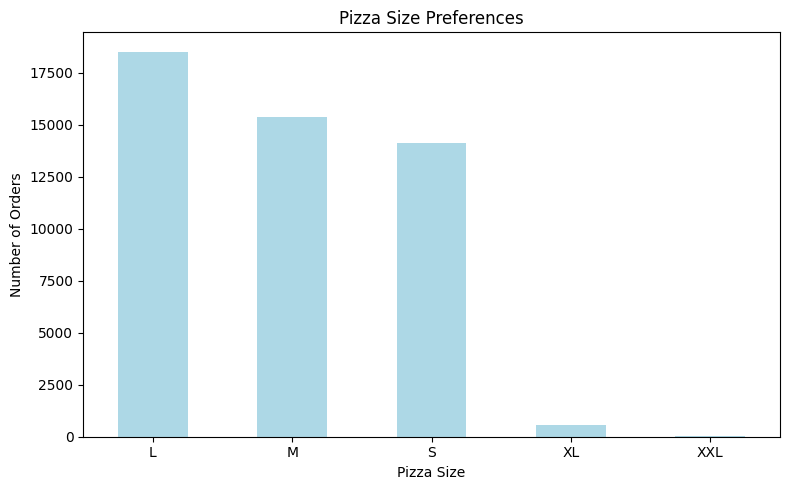

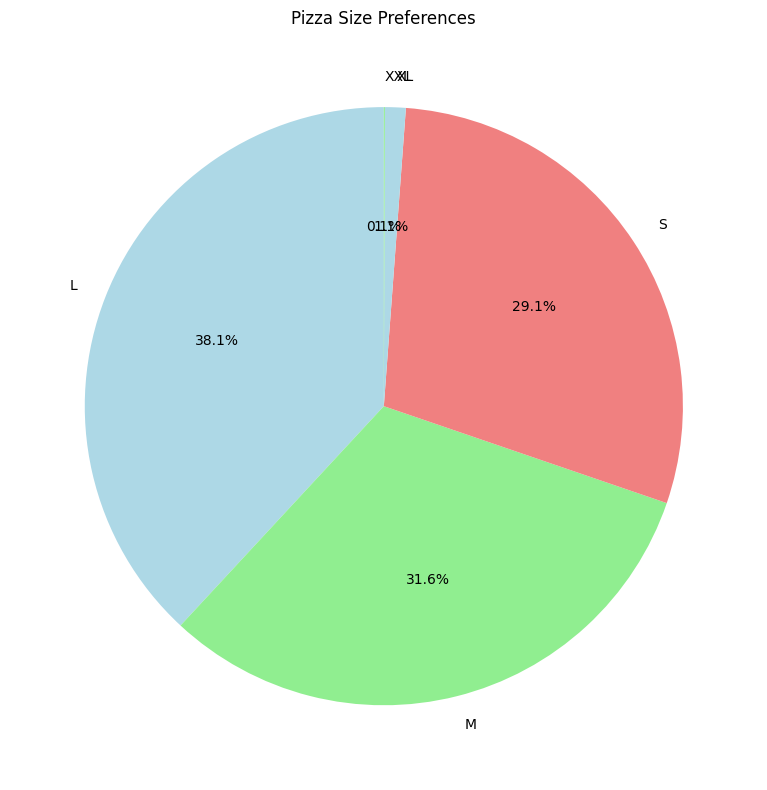

In [11]:
size_preferences = df.groupby('pizza_size').size()

# Plotting the size preferences using a bar chart
plt.figure(figsize=(8, 5))  # Set the size of the plot for better readability
size_preferences.plot(kind='bar', color='lightblue')
plt.title('Pizza Size Preferences')
plt.xlabel('Pizza Size')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Keep the size labels horizontal for clarity
plt.tight_layout()  # Adjust layout
plt.show()

plt.figure(figsize=(8, 8))  # Set the size of the plot for better readability
size_preferences.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Pizza Size Preferences')
plt.ylabel('')  # Pie chart does not typically need a y-axis label
plt.tight_layout()  # Adjust layout
plt.show()




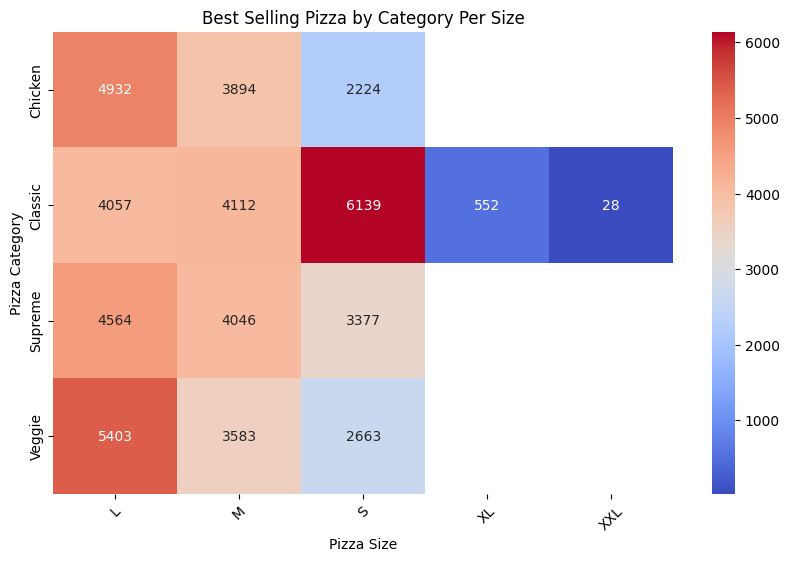

In [12]:
# Group by 'pizza_category' and 'pizza_size', then sum the 'quantity'
import seaborn as sns
category_size_sales = df.groupby(['pizza_category', 'pizza_size'])['quantity'].sum().reset_index()

pivot_table = category_size_sales.pivot(index='pizza_category', columns='pizza_size', values='quantity')

category_size_sales = df.groupby(['pizza_category', 'pizza_size'])['quantity'].sum().reset_index()
# Pivot the table to get pizza sizes on columns and categories on rows

# Plotting with a heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Best Selling Pizza by Category Per Size')
plt.xlabel('Pizza Size')
plt.ylabel('Pizza Category')
plt.xticks(rotation=45)  # Rotate the size labels for better readability
plt.show()